# BUILDING THE DATASETS (TRAINING AND TESTING):

In [143]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

# CSV:
batting_2015 ="""Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Cardenales de Lara,,26.1,4.94,64,2430,2125,316,591,111,17,45,271,48,29,214,365,.278,.351,.410,.761,871,68,33,40,18,12
Navegantes del Magallanes,,28.2,4.70,63,2448,2095,296,578,83,12,24,259,42,15,267,355,.276,.364,.361,.726,757,72,36,29,21,18
Leones del Caracas,,26.5,4.57,65,2498,2196,297,618,122,11,51,272,26,17,236,383,.281,.354,.417,.771,915,65,22,26,18,25
Tiburones de La Guaira,,28.8,4.49,63,2398,2116,283,611,96,11,32,260,19,18,195,399,.289,.355,.390,.745,825,85,33,33,21,16
Tigres de Aragua,,26.4,4.19,63,2370,2133,264,560,80,25,29,238,39,21,164,385,.263,.323,.364,.687,777,59,35,21,17,9
Bravos de Margarita,,26.1,4.05,63,2371,2126,255,583,98,13,37,227,30,33,187,396,.274,.337,.385,.722,818,70,21,24,13,11
Caribes de Anzoategui,,28.8,4.05,64,2418,2127,259,579,102,14,28,231,22,17,228,330,.272,.345,.373,.718,793,73,18,28,17,14
Aguilas del Zulia,,27.4,3.70,63,2387,2116,233,547,106,14,21,212,19,25,213,347,.259,.330,.352,.682,744,55,21,22,15,20
League Totals,,27.3,4.34,508,19320,17034,2203,4667,798,117,267,1970,245,175,1704,2960,.274,.345,.382,.727,6500,547,219,223,140,125"""

# CONVERTING DE CSV TEXT
datos = StringIO(batting_2015)

# CSV TEXT TO DF
df = pd.read_csv(datos)

# Filtering the Data Frame: Relevant Variables
B_2015 = df

#Adding year label to the column
B_2015['Year'] = 2015

#Changing column names:
B_2015.rename(columns={'R': 'RS'}, inplace=True)

pitching_2015 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,26.9,3.92,33,31,.516,3.66,4.06,64,64,64,0,4,13,556.0,557,251,226,29,210,19,386,20,4,29,2365,1.379,9.0,0.5,3.4,6.2,1.84
Caribes de Anzoategui,,26.9,4.02,34,30,.531,3.56,4.12,64,64,64,0,8,22,561.1,589,257,222,41,216,23,429,37,4,42,2453,1.434,9.4,0.7,3.5,6.9,1.99
Leones del Caracas,,26.2,4.05,35,30,.538,3.74,4.15,65,65,64,1,6,16,571.0,556,263,237,37,205,13,394,28,3,30,2407,1.333,8.8,0.6,3.2,6.2,1.92
Bravos de Margarita,,26.4,4.22,28,35,.444,3.72,4.33,63,63,63,0,5,16,553.1,568,266,229,22,242,26,334,26,4,50,2424,1.464,9.2,0.4,3.9,5.4,1.38
Tiburones de La Guaira,,27.6,4.32,33,30,.524,3.88,4.49,63,63,62,1,4,14,544.2,565,272,235,33,232,8,360,25,4,49,2367,1.463,9.3,0.5,3.8,5.9,1.55
Tigres de Aragua,,28.5,4.40,31,32,.492,3.81,4.49,63,63,62,1,6,15,555.2,569,277,235,28,185,7,366,18,2,39,2375,1.357,9.2,0.5,3.0,5.9,1.98
Navegantes del Magallanes,,27.3,4.86,36,27,.571,4.26,4.96,63,63,63,0,0,25,555.1,641,306,263,51,199,13,321,28,2,42,2463,1.513,10.4,0.8,3.2,5.2,1.61
Aguilas del Zulia,,26.6,4.94,24,39,.381,4.32,5.07,63,63,63,0,4,18,551.2,621,311,265,26,214,16,369,37,6,47,2464,1.514,10.1,0.4,3.5,6.0,1.72
League Totals,,27.0,4.34,254,254,.500,3.87,4.46,508,508,505,3,37,139,4449.0,4666,2203,1912,267,1703,125,2959,219,29,328,19318,1.432,9.4,0.5,3.4,6.0,1.74"""

# Usar StringIO para tratar el texto como un archivo
datos = StringIO(pitching_2015)

# Convertir el texto CSV en un DataFrame
df = pd.read_csv(datos)

#Calculating the OOBP, we need: H, BB,HBP, AB, SF
P_2015 = df

#Changing column names:
P_2015.rename(columns={'R': 'RA'}, inplace=True)

#Merging the pitching and batting stats:
LVBP_2015 = B_2015.merge(P_2015, on = 'Finals')
LVBP_2015 = LVBP_2015.sort_values(by = 'W', ascending = False)

LVBP_2015 = LVBP_2015.drop(8)


#Data sets from 2016 to 2023 Batting and Pitchig:

#2016 stats:
batting_2016 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Caribes de Anzoategui,,28.2,5.32,63,2455,2163,335,599,97,16,55,310,20,12,225,400,.277,.346,.413,.759,893,57,17,27,23,18
Navegantes del Magallanes,,28.6,4.89,63,2430,2136,308,584,112,16,31,270,26,15,222,374,.273,.349,.384,.733,821,72,34,20,18,14
Tigres de Aragua,,24.9,4.67,63,2383,2113,294,585,97,12,35,265,25,11,185,361,.277,.343,.384,.727,811,70,40,21,24,17
Cardenales de Lara,,26.7,4.65,63,2353,2119,293,618,108,15,37,273,42,18,179,359,.292,.351,.409,.760,867,80,26,8,21,13
Tiburones de La Guaira,,27.5,4.52,63,2417,2110,285,582,111,12,34,265,34,26,240,389,.276,.355,.388,.744,819,66,30,20,17,13
Leones del Caracas,,26.8,4.33,63,2392,2124,273,565,123,11,38,251,20,19,205,417,.266,.336,.388,.724,824,63,26,26,11,15
Aguilas del Zulia,,26.6,4.29,63,2307,2051,270,553,104,15,32,239,23,26,185,366,.270,.336,.382,.717,783,51,29,21,21,11
Bravos de Margarita,,26.4,4.14,63,2365,2108,261,559,96,18,37,228,49,30,203,433,.265,.335,.381,.715,802,60,25,12,17,15
League Totals,,27.0,4.60,504,19102,16924,2319,4645,848,115,299,2101,239,157,1644,3099,.275,.344,.391,.735,6620,519,227,155,152,116"""

pitching_2016 ="""Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,28.0,3.95,39,24,.619,3.62,4.09,63,63,62,1,4,22,547.2,526,249,220,37,182,19,373,24,2,32,2313,1.293,8.6,0.6,3.0,6.1,2.05
Tigres de Aragua,,28.5,4.05,30,33,.476,3.67,4.18,63,63,63,0,4,9,549.1,556,255,224,41,177,9,361,25,2,36,2348,1.334,9.1,0.7,2.9,5.9,2.04
Bravos de Margarita,,27.7,4.40,30,33,.476,4.04,4.53,63,63,63,0,2,19,550.0,565,277,247,41,198,17,391,30,3,38,2361,1.387,9.2,0.7,3.2,6.4,1.97
Aguilas del Zulia,,27.8,4.41,33,30,.524,4.12,4.64,63,63,63,0,2,18,539.1,580,278,247,32,211,12,361,34,3,28,2365,1.467,9.7,0.5,3.5,6.0,1.71
Tiburones de La Guaira,,27.3,4.68,30,33,.476,4.26,4.85,63,63,62,1,3,16,547.1,604,295,259,38,207,15,413,38,8,37,2406,1.482,9.9,0.6,3.4,6.8,2.00
Caribes de Anzoategui,,28.3,4.98,34,29,.540,4.45,5.08,63,63,63,0,2,16,556.1,590,314,275,37,234,15,384,26,2,44,2430,1.481,9.5,0.6,3.8,6.2,1.64
Navegantes del Magallanes,,27.1,5.03,29,34,.460,4.58,5.19,63,63,63,0,3,17,550.0,629,317,280,33,196,13,399,27,3,38,2429,1.500,10.3,0.5,3.2,6.5,2.04
Leones del Caracas,,27.2,5.30,27,36,.429,4.56,5.44,63,63,63,0,5,16,553.0,595,334,280,40,239,16,417,23,0,46,2456,1.508,9.7,0.7,3.9,6.8,1.74
League Totals,,27.7,4.60,252,252,.500,4.16,4.75,504,504,502,2,25,133,4393.0,4645,2319,2032,299,1644,116,3099,227,23,299,19108,1.432,9.5,0.6,3.4,6.3,1.89"""

#2017 stats:
batting_2017 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Navegantes del Magallanes,,28.2,5.49,63,2522,2192,346,627,108,9,49,325,26,14,250,383,.286,.366,.411,.777,900,81,40,19,21,21
Cardenales de Lara,,26.1,5.46,63,2478,2204,344,701,114,13,31,324,23,17,208,355,.318,.380,.424,.804,934,66,26,17,23,25
Caribes de Anzoategui,,28.2,5.06,63,2457,2116,319,605,117,11,48,290,28,15,264,361,.286,.370,.420,.789,888,61,29,28,20,25
Leones del Caracas,,26.9,4.94,63,2466,2195,311,614,121,12,45,278,16,28,212,354,.280,.346,.407,.753,894,74,22,16,21,10
Aguilas del Zulia,,27.3,4.43,63,2400,2087,279,599,82,12,35,257,23,18,241,380,.287,.365,.388,.753,810,76,27,24,21,18
Tiburones de La Guaira,,26.1,4.32,63,2371,2091,272,587,97,22,17,251,40,27,206,320,.281,.350,.373,.722,779,76,29,21,24,10
Tigres de Aragua,,26.7,3.98,63,2270,1991,251,493,79,14,38,222,21,3,202,329,.248,.324,.359,.683,714,63,32,26,19,15
Bravos de Margarita,,25.0,3.73,63,2225,1992,235,534,82,13,11,199,43,33,174,410,.268,.331,.339,.670,675,59,21,22,16,13
League Totals,,26.9,4.68,504,19189,16868,2357,4760,800,106,274,2146,220,155,1757,2892,.282,.355,.391,.746,6594,556,226,173,165,137"""

pitching_2017 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Bravos de Margarita,,27.2,4.03,25,38,.397,3.99,4.37,63,63,63,0,2,13,523.0,580,254,232,33,216,21,338,27,2,32,2296,1.522,10.0,0.6,3.7,5.8,1.56
Cardenales de Lara,,29.2,4.14,38,25,.603,3.93,4.30,63,63,63,0,5,21,546.2,540,261,239,28,214,10,359,20,1,29,2339,1.379,8.9,0.5,3.5,5.9,1.68
Tigres de Aragua,,29.9,4.32,32,31,.508,4.07,4.59,63,63,63,0,6,18,533.1,594,272,241,32,189,10,306,21,0,34,2308,1.468,10.0,0.5,3.2,5.2,1.62
Aguilas del Zulia,,28.5,4.37,31,32,.492,3.89,4.59,63,63,63,0,6,18,539.2,545,275,233,19,204,15,370,30,2,35,2317,1.388,9.1,0.3,3.4,6.2,1.81
Navegantes del Magallanes,,27.6,4.92,35,28,.556,4.38,4.91,63,63,63,0,2,16,567.2,615,310,276,40,280,19,364,29,3,43,2538,1.577,9.8,0.6,4.4,5.8,1.30
Leones del Caracas,,27.1,4.94,35,28,.556,4.42,4.94,63,63,63,0,1,13,566.1,602,311,278,48,228,24,410,29,1,32,2482,1.466,9.6,0.8,3.6,6.5,1.80
Tiburones de La Guaira,,29.0,5.10,24,39,.381,4.64,5.34,63,63,63,0,3,11,541.1,651,321,279,30,186,13,370,41,3,43,2435,1.546,10.8,0.5,3.1,6.2,1.99
Caribes de Anzoategui,,26.9,5.60,32,31,.508,4.93,5.80,63,63,63,0,4,12,547.1,633,353,300,44,240,25,375,29,0,41,2478,1.595,10.4,0.7,3.9,6.2,1.56
League Totals,,28.2,4.68,252,252,.500,4.28,4.86,504,504,504,0,29,122,4365.1,4760,2357,2078,274,1757,137,2892,226,12,289,19193,1.493,9.8,0.6,3.6,6.0,1.65"""

#2018 stats:

batting_2018 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Navegantes del Magallanes,,28.7,4.92,63,2388,2130,310,596,90,9,63,290,15,15,194,397,.280,.342,.419,.761,893,58,20,19,25,22
Tigres de Aragua,,25.7,4.52,63,2386,2106,285,592,81,8,33,263,46,14,213,391,.281,.352,.374,.727,788,62,29,19,19,21
Leones del Caracas,,26.8,4.43,63,2355,2120,279,590,89,10,33,259,29,20,175,332,.278,.338,.376,.715,798,67,27,13,20,13
Caribes de Anzoategui,,28.4,4.38,63,2350,2026,276,545,98,7,37,257,18,8,237,266,.269,.351,.379,.731,768,65,35,25,27,20
Bravos de Margarita,,27.3,4.19,63,2307,2067,264,579,106,21,30,243,40,27,182,357,.280,.342,.395,.737,817,69,23,15,20,19
Cardenales de Lara,,28.1,3.92,63,2359,2128,247,584,84,9,35,223,23,14,183,320,.274,.338,.372,.709,791,77,26,10,12,18
Aguilas del Zulia,,28.3,3.77,61,2258,2034,230,556,89,15,20,209,33,25,161,320,.273,.331,.361,.693,735,59,23,23,17,13
Tiburones de La Guaira,,26.9,3.67,61,2246,2017,224,536,91,6,15,208,40,30,180,341,.266,.330,.339,.669,684,61,22,12,15,15
League Totals,,27.5,4.23,500,18649,16628,2115,4578,728,85,266,1952,244,153,1525,2724,.275,.341,.377,.718,6274,518,205,136,155,141"""

pitching_2018 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,28.8,3.41,35,28,.556,3.31,3.52,63,63,63,0,8,18,549.0,544,215,202,28,170,15,365,19,0,24,2294,1.301,8.9,0.5,2.8,6.0,2.15
Bravos de Margarita,,27.0,3.90,32,31,.508,3.35,4.12,63,63,61,2,8,8,537.0,556,246,200,32,169,15,344,26,1,29,2307,1.350,9.3,0.5,2.8,5.8,2.04
Leones del Caracas,,26.8,4.10,34,29,.540,3.58,4.24,63,63,62,1,8,18,548.0,554,258,218,39,207,25,336,29,3,27,2374,1.389,9.1,0.6,3.4,5.5,1.62
Caribes de Anzoategui,,28.6,4.16,31,32,.492,3.99,4.42,63,62,60,2,5,15,534.0,574,262,237,31,192,18,375,31,0,32,2335,1.434,9.7,0.5,3.2,6.3,1.95
Tigres de Aragua,,27.2,4.40,33,30,.524,3.75,4.64,63,63,63,0,5,11,537.2,586,277,224,31,197,12,324,28,5,35,2364,1.456,9.8,0.5,3.3,5.4,1.64
Tiburones de La Guaira,,28.8,4.46,28,33,.459,4.19,4.65,61,61,61,0,4,14,526.0,576,272,245,34,208,23,320,30,4,32,2317,1.490,9.9,0.6,3.6,5.5,1.54
Aguilas del Zulia,,28.9,4.69,21,40,.344,4.25,4.94,61,61,61,0,2,7,521.1,559,286,246,37,223,20,343,21,2,58,2286,1.500,9.7,0.6,3.8,5.9,1.54
Navegantes del Magallanes,,28.4,4.75,36,27,.571,4.14,4.93,63,62,62,0,0,18,545.1,629,299,251,34,159,13,317,21,0,28,2377,1.445,10.4,0.6,2.6,5.2,1.99
League Totals,,28.1,4.23,250,250,.500,3.82,4.43,500,498,493,5,40,109,4298.1,4578,2115,1823,266,1525,141,2724,205,15,265,18654,1.420,9.6,0.6,3.2,5.7,1.79"""

#2019 stats:

batting_2019 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Caribes de Anzoategui,,30.3,5.83,42,1609,1375,245,398,70,7,43,231,20,13,173,231,.290,.377,.444,.821,611,38,34,4,23,9
Aguilas del Zulia,,30.8,5.79,42,1623,1412,243,419,78,11,11,219,14,8,164,226,.297,.372,.391,.763,552,35,17,10,20,11
Tiburones de La Guaira,,28.0,5.48,42,1706,1494,230,451,68,9,21,209,38,16,152,231,.302,.370,.402,.772,600,41,23,14,23,8
Cardenales de Lara,,28.7,5.24,42,1596,1433,220,417,61,12,16,186,32,13,116,256,.291,.349,.384,.733,550,41,20,13,14,8
Navegantes del Magallanes,,28.2,5.02,43,1761,1540,216,439,70,11,25,197,34,18,170,314,.285,.362,.394,.755,606,40,24,11,16,13
Tigres de Aragua,,28.5,4.93,42,1687,1473,207,405,62,13,21,185,28,13,160,245,.275,.356,.378,.733,556,44,31,12,11,8
Leones del Caracas,,27.6,4.63,43,1649,1447,199,393,76,7,24,182,23,13,163,264,.272,.349,.384,.733,555,49,15,13,11,11
Bravos de Margarita,,27.2,3.90,42,1563,1363,164,340,46,7,14,143,41,26,148,285,.249,.330,.324,.655,442,36,23,16,13,7
League Totals,,28.6,5.10,338,13194,11537,1724,3262,531,77,175,1552,230,120,1246,2052,.283,.358,.388,.746,4472,324,187,93,131,75"""

pitching_2019 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,29.7,4.00,24,18,.571,3.78,4.18,42,42,42,0,4,11,362.0,362,168,152,17,145,1,234,18,1,10,1555,1.401,9.0,0.4,3.6,5.8,1.61
Tigres de Aragua,,29.7,4.79,17,25,.405,4.46,4.82,42,42,42,0,0,10,375.1,419,201,186,26,139,9,277,11,3,31,1660,1.487,10.0,0.6,3.3,6.6,1.99
Aguilas del Zulia,,31.2,4.79,24,18,.571,3.99,5.07,42,42,42,0,0,10,356.2,371,201,158,23,169,11,234,27,0,33,1596,1.514,9.4,0.6,4.3,5.9,1.38
Caribes de Anzoategui,,31.1,4.83,22,20,.524,4.50,5.19,42,42,42,0,2,8,352.0,382,203,176,21,149,7,269,27,0,22,1563,1.509,9.8,0.5,3.8,6.9,1.81
Tiburones de La Guaira,,29.8,5.17,25,17,.595,4.73,5.15,42,42,42,0,2,17,379.0,411,217,199,28,151,7,271,23,1,18,1668,1.483,9.8,0.7,3.6,6.4,1.79
Navegantes del Magallanes,,29.7,5.37,21,21,.500,4.39,5.31,43,43,41,2,1,10,391.2,413,231,191,21,165,15,271,20,2,37,1729,1.476,9.5,0.5,3.8,6.2,1.64
Leones del Caracas,,27.4,5.47,20,22,.476,5.01,5.66,43,43,43,0,1,10,373.2,437,235,208,23,160,17,260,37,0,28,1712,1.598,10.5,0.6,3.9,6.3,1.63
Bravos de Margarita,,27.2,6.38,15,27,.357,5.91,6.69,42,42,42,0,0,10,360.2,469,268,237,16,168,8,236,24,1,40,1715,1.766,11.7,0.4,4.2,5.9,1.40
League Totals,,29.5,5.10,168,168,.500,4.60,5.26,338,338,336,2,10,86,2951.0,3264,1724,1507,175,1246,75,2052,187,8,219,13198,1.528,10.0,0.5,3.8,6.3,1.65"""

#2020 stats:

batting_2020 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Bravos de Margarita,,24.7,6.20,40,1539,1309,248,397,72,8,25,227,31,15,179,215,.303,.394,.428,.822,560,43,27,8,16,5
Cardenales de Lara,,29.1,5.68,40,1502,1272,227,378,67,7,26,215,21,8,177,204,.297,.392,.422,.814,537,52,30,9,14,17
Tigres de Aragua,,30.3,5.43,37,1316,1131,201,333,62,8,14,179,29,7,153,146,.294,.380,.401,.781,453,51,13,4,15,13
Tiburones de La Guaira,,27.6,5.30,40,1491,1300,212,378,77,5,19,196,22,7,142,265,.291,.372,.402,.773,522,40,32,6,11,14
Caribes de Anzoategui,,28.0,4.93,40,1508,1300,197,393,74,3,30,178,15,11,161,188,.302,.386,.433,.819,563,53,21,17,9,13
Leones del Caracas,,27.1,4.85,40,1484,1323,194,378,70,4,25,180,9,6,132,207,.286,.353,.401,.754,531,58,11,7,11,9
Navegantes del Magallanes,,29.1,4.78,37,1294,1151,177,337,67,11,29,165,20,14,101,180,.293,.359,.446,.804,513,32,25,3,14,3
Aguilas del Zulia,,26.0,4.40,40,1412,1275,176,372,68,8,21,162,15,4,95,223,.292,.343,.407,.750,519,36,16,5,21,7
League Totals,,27.7,5.20,314,11546,10061,1632,2966,557,54,189,1502,162,72,1140,1628,.295,.373,.417,.790,4198,365,175,59,111,81"""

pitching_2020 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Navegantes del Magallanes,,29.2,3.95,21,16,.568,4.01,4.51,37,37,37,0,4,7,291.2,336,146,130,17,91,7,204,17,1,13,1264,1.464,10.4,0.5,2.8,6.3,2.24
Cardenales de Lara,,28.7,4.25,25,15,.625,3.43,4.66,40,40,40,0,2,6,328.1,328,170,125,23,126,14,204,13,1,12,1418,1.383,9.0,0.6,3.5,5.6,1.62
Caribes de Anzoategui,,28.4,4.75,24,16,.600,4.56,5.09,40,40,40,0,2,10,335.2,386,190,170,22,142,10,240,20,2,35,1493,1.573,10.3,0.6,3.8,6.4,1.69
Tigres de Aragua,,30.4,4.89,17,20,.459,4.55,5.64,37,37,35,2,2,7,288.2,318,181,146,23,155,11,174,20,0,14,1311,1.639,9.9,0.7,4.8,5.4,1.12
Bravos de Margarita,,26.9,5.05,20,20,.500,4.62,5.52,40,40,39,1,3,7,329.1,378,202,169,23,141,5,214,28,1,26,1499,1.576,10.3,0.6,3.9,5.8,1.52
Tiburones de La Guaira,,26.4,5.98,16,24,.400,5.84,6.65,40,40,39,1,1,5,323.2,402,239,210,26,158,6,169,23,3,27,1506,1.730,11.2,0.7,4.4,4.7,1.07
Leones del Caracas,,27.1,6.25,15,25,.375,5.89,6.72,40,40,40,0,2,5,334.2,413,250,219,30,142,6,221,29,1,29,1536,1.658,11.1,0.8,3.8,5.9,1.56
Aguilas del Zulia,,25.9,6.35,19,21,.475,6.40,7.19,40,40,40,0,1,12,318.0,405,254,226,25,185,22,202,25,2,25,1519,1.855,11.5,0.7,5.2,5.7,1.09
League Totals,,27.8,5.20,157,157,.500,4.92,5.76,314,314,310,4,17,59,2550.0,2966,1632,1395,189,1140,81,1628,175,11,181,11546,1.610,10.5,0.7,4.0,5.7,1.43"""

#2021 stats:

batting_2021 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Caribes de Anzoategui,,29.3,6.39,49,1941,1670,313,499,99,8,50,295,13,9,188,269,.299,.376,.458,.833,764,57,36,16,31,14
Navegantes del Magallanes,,30.6,6.08,49,1952,1705,298,496,103,13,56,280,27,17,199,336,.291,.371,.465,.836,793,40,27,6,15,6
Leones del Caracas,,28.2,5.88,49,1982,1729,288,511,92,4,31,254,17,9,216,326,.296,.378,.407,.785,704,55,19,9,9,10
Cardenales de Lara,,28.3,5.86,49,1894,1672,287,484,95,9,50,268,21,12,185,287,.290,.363,.447,.809,747,42,15,7,15,13
Bravos de Margarita,,26.1,5.72,50,1958,1692,286,464,77,6,41,250,14,15,202,322,.274,.361,.400,.761,676,56,39,6,19,9
Tigres de Aragua,,29.5,5.56,50,2008,1768,278,509,96,4,44,257,15,10,163,280,.288,.358,.421,.780,745,59,43,13,21,12
Aguilas del Zulia,,26.9,5.33,49,1927,1691,261,454,81,15,26,236,21,12,187,297,.269,.346,.380,.727,643,43,22,13,14,11
Tiburones de La Guaira,,27.4,4.78,49,1887,1672,234,456,78,8,29,206,26,16,180,308,.273,.346,.381,.727,637,53,16,4,15,10
League Totals,,28.3,5.70,394,15549,13599,2245,3873,721,67,327,2046,154,100,1520,2425,.285,.363,.420,.782,5709,405,217,74,139,85"""

pitching_2021 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,28.5,4.16,28,21,.571,3.59,4.36,49,49,49,0,5,12,421.0,409,204,168,38,133,5,327,28,2,16,1794,1.287,8.7,0.8,2.8,7.0,2.46
Navegantes del Magallanes,,28.7,5.53,32,17,.653,5.11,5.63,49,49,48,1,3,18,433.0,476,271,246,51,176,5,299,33,4,19,1921,1.506,9.9,1.1,3.7,6.2,1.70
Bravos de Margarita,,27.1,5.64,25,25,.500,5.01,5.79,50,50,50,0,1,8,438.0,515,282,244,47,186,17,269,23,2,19,2001,1.600,10.6,1.0,3.8,5.5,1.45
Leones del Caracas,,26.7,5.69,26,23,.531,5.05,5.85,49,49,49,0,1,9,429.1,506,279,241,34,174,11,286,24,2,22,1943,1.584,10.6,0.7,3.6,6.0,1.64
Aguilas del Zulia,,28.5,5.78,20,29,.408,5.29,5.91,49,49,49,0,1,9,430.2,455,283,253,36,227,16,307,24,1,45,1933,1.584,9.5,0.8,4.7,6.4,1.35
Caribes de Anzoategui,,28.9,5.88,25,24,.510,5.67,6.14,49,49,49,0,2,9,422.0,465,288,266,38,219,12,336,27,3,34,1926,1.621,9.9,0.8,4.7,7.2,1.53
Tigres de Aragua,,31.4,6.24,26,24,.520,5.56,6.28,50,50,50,0,1,14,447.0,530,312,276,42,216,8,315,26,2,37,2079,1.669,10.7,0.8,4.3,6.3,1.46
Tiburones de La Guaira,,27.5,6.65,15,34,.306,6.19,6.93,49,49,48,1,2,8,423.1,517,326,291,41,189,11,286,32,3,50,1956,1.668,11.0,0.9,4.0,6.1,1.51
League Totals,,28.5,5.70,197,197,.500,5.19,5.87,394,394,392,2,16,87,3444.1,3873,2245,1985,327,1520,85,2425,217,19,242,15553,1.566,10.1,0.9,4.0,6.3,1.60"""

#2022 stats:

batting_2022 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Leones del Caracas,,27.7,6.29,55,2208,1944,346,582,103,7,58,323,16,8,224,382,.299,.375,.449,.824,873,49,21,4,15,10
Cardenales de Lara,,27.8,6.04,55,2113,1827,332,525,105,10,53,306,31,10,218,265,.287,.367,.443,.810,809,48,30,5,33,15
Tiburones de La Guaira,,26.8,5.67,55,2180,1861,312,529,95,15,30,283,32,13,269,346,.284,.377,.400,.776,744,53,21,5,24,13
Navegantes del Magallanes,,30.0,5.59,56,2230,1961,313,563,96,8,49,286,22,18,208,328,.287,.362,.419,.781,822,63,33,10,18,10
Bravos de Margarita,,27.6,5.11,55,2111,1810,281,522,81,12,37,258,29,16,217,256,.288,.371,.408,.778,738,70,36,19,29,9
Tigres de Aragua,,30.5,5.05,55,2097,1822,278,540,84,6,40,246,5,11,219,264,.296,.372,.415,.787,756,78,16,13,27,11
Caribes de Anzoategui,,28.7,4.71,55,2114,1852,259,489,76,12,46,241,17,6,199,300,.264,.341,.393,.733,727,38,29,8,26,11
Aguilas del Zulia,,27.6,4.25,56,2133,1839,238,476,71,11,23,217,22,13,245,370,.259,.349,.347,.696,638,46,18,18,13,6
League Totals,,28.3,5.34,442,17186,14916,2359,4226,711,81,336,2160,174,95,1799,2511,.283,.364,.409,.774,6107,445,204,82,185,85"""

pitching_2022 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Leones del Caracas,,28.8,4.71,36,19,.655,4.38,4.83,55,55,55,0,2,19,482.2,510,259,235,35,214,10,342,15,3,28,2128,1.500,9.5,0.7,4.0,6.4,1.60
Cardenales de Lara,,28.2,5.13,34,21,.618,4.87,5.42,55,55,55,0,3,12,468.0,513,282,253,35,195,5,325,28,2,36,2095,1.513,9.9,0.7,3.8,6.3,1.67
Tiburones de La Guaira,,26.4,5.22,29,26,.527,4.60,5.44,55,55,55,0,6,13,475.0,512,287,243,39,230,5,310,26,3,26,2131,1.562,9.7,0.7,4.4,5.9,1.35
Aguilas del Zulia,,27.8,5.27,21,35,.375,4.36,5.59,56,56,56,0,4,13,475.0,498,295,230,27,240,16,300,27,4,41,2153,1.554,9.4,0.5,4.5,5.7,1.25
Bravos de Margarita,,28.0,5.35,26,29,.473,5.22,5.72,55,55,55,0,3,11,462.1,548,294,268,51,218,10,282,29,7,24,2124,1.657,10.7,1.0,4.2,5.5,1.29
Tigres de Aragua,,29.7,5.62,25,30,.455,5.39,5.99,55,55,55,0,3,10,464.0,555,309,278,38,233,9,287,31,1,46,2154,1.698,10.8,0.7,4.5,5.6,1.23
Navegantes del Magallanes,,27.7,5.71,29,27,.518,5.01,5.81,56,56,56,0,0,12,495.1,574,320,276,59,201,13,338,25,2,25,2237,1.565,10.4,1.1,3.7,6.1,1.68
Caribes de Anzoategui,,29.8,5.71,21,34,.382,5.06,6.00,55,55,55,0,3,13,471.1,516,314,265,52,268,17,327,23,2,18,2173,1.663,9.9,1.0,5.1,6.2,1.22
League Totals,,28.3,5.34,221,221,.500,4.86,5.60,442,442,442,0,24,103,3793.2,4226,2360,2048,336,1799,85,2511,204,24,244,17195,1.588,10.0,0.8,4.3,6.0,1.40"""

#2023 stats:

batting_2023 = """Finals,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Tiburones de La Guaira,,28.7,6.34,56,2285,1967,355,602,114,11,51,315,40,20,241,314,.306,.387,.453,.840,891,49,37,13,27,9
Bravos de Margarita,,29.1,5.78,55,2208,1877,318,565,87,17,34,296,46,15,260,296,.301,.390,.420,.810,788,70,30,16,25,8
Leones del Caracas,,29.0,5.70,56,2213,1901,319,548,101,12,53,294,29,10,256,359,.288,.375,.438,.813,832,53,23,7,26,14
Cardenales de Lara,,28.2,5.57,56,2154,1873,312,531,102,17,36,285,54,20,203,324,.284,.361,.414,.775,775,59,43,3,32,6
Navegantes del Magallanes,,27.2,5.05,57,2229,1961,288,553,102,8,46,272,33,8,203,344,.282,.355,.413,.767,809,51,31,10,24,3
Tigres de Aragua,,28.3,4.98,55,2128,1867,274,527,89,13,28,256,29,5,186,285,.282,.352,.389,.741,726,60,29,22,24,15
Aguilas del Zulia,,27.5,4.79,57,2172,1895,273,534,103,18,28,250,32,17,223,331,.282,.361,.400,.761,757,58,20,20,14,7
Caribes de Anzoategui,,28.8,4.54,56,2040,1786,254,471,90,8,44,236,20,4,182,302,.264,.341,.397,.738,709,53,39,13,20,5
League Totals,,28.3,5.34,448,17429,15127,2393,4331,788,104,320,2204,283,99,1754,2555,.286,.366,.416,.781,6287,453,252,104,192,67"""

pitching_2023 = """Finals,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,29.2,4.66,33,23,.589,4.24,4.79,56,56,56,0,6,13,490.1,541,261,231,34,199,16,338,32,5,27,2175,1.509,9.9,0.6,3.7,6.2,1.70
Leones del Caracas,,28.5,4.80,32,24,.571,4.53,5.00,56,56,56,0,1,14,484.2,539,269,244,41,166,5,323,23,5,29,2125,1.455,10.0,0.8,3.1,6.0,1.95
Tigres de Aragua,,29.1,5.11,29,26,.527,4.72,5.24,55,55,55,0,3,11,482.1,529,281,253,39,200,3,306,29,2,34,2142,1.511,9.9,0.7,3.7,5.7,1.53
Bravos de Margarita,,28.4,5.36,30,25,.545,5.23,5.53,55,55,55,0,4,14,480.1,549,295,279,41,193,4,317,27,3,21,2151,1.545,10.3,0.8,3.6,5.9,1.64
Tiburones de La Guaira,,27.1,5.43,30,26,.536,5.11,5.57,56,56,56,0,1,12,491.1,522,304,279,36,267,8,335,25,6,46,2206,1.606,9.6,0.7,4.9,6.1,1.25
Aguilas del Zulia,,27.0,5.67,25,32,.439,5.01,6.00,57,57,57,0,2,10,484.2,520,323,270,30,275,12,303,43,2,39,2233,1.640,9.7,0.6,5.1,5.6,1.10
Navegantes del Magallanes,,27.1,5.68,24,33,.421,5.32,5.90,57,57,57,0,0,9,494.0,560,324,292,44,212,9,350,38,2,41,2234,1.563,10.2,0.8,3.9,6.4,1.65
Caribes de Anzoategui,,26.9,6.00,21,35,.375,5.79,6.57,56,56,56,0,2,8,460.1,571,336,296,55,242,10,283,35,1,26,2167,1.766,11.2,1.1,4.7,5.5,1.17
League Totals,,27.9,5.34,224,224,.500,4.99,5.57,448,448,448,0,19,91,3868.0,4331,2393,2144,320,1754,67,2555,252,26,263,17433,1.573,10.1,0.7,4.1,5.9,1.46"""

#CREATING DE DATA FRAMES FOR EACH YEAR FOLLOWING THE STRUCTURED FROM LINE 4 TO LINE 58 OF CODE

years = list(range(2016, 2024))

for year in years:
    batting_data = globals().get(f'batting_{year}')
    pitching_data = globals().get(f'pitching_{year}')
    datos = StringIO(batting_data)
    datos_2 = StringIO(pitching_data)
    B_year = pd.read_csv(datos)
    P_year =pd.read_csv(datos_2)

    # Seleccionar las columnas necesarias y renombrar
    B_year['Year'] = year  # Asignar el año correcto
    B_year.rename(columns={'R': 'RS'}, inplace=True)
    P_year.rename(columns={'R': 'RA'}, inplace=True)

    LVBP_year = B_year.merge(P_year, on = 'Finals')
    LVBP_year = LVBP_year.sort_values(by = 'W', ascending = False)
    LVBP_year = LVBP_year.drop(8)
    globals()[f'LVBP_{year}'] = LVBP_year

#MERGING THE DATA SETS:

LVBP_training = pd.concat([LVBP_2015,LVBP_2016,LVBP_2017,LVBP_2018,LVBP_2019,LVBP_2020,LVBP_2021,LVBP_2022,LVBP_2023])
LVBP_training = LVBP_training.reset_index(drop=True)

#SAVING THE MODEL INTO A CSV FOR FUTURE PURPOSES:
LVBP_training.to_csv('LVBP.csv', index=False)

#------------------------------------------------------------------------------------------------------------------------------
#TESTING DATA SET:
# CSV:
batting_test ="""Tm,Aff,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Leones del Caracas,,29.1,5.93,57,2260,1942,338,557,122,6,73,324,21,15,259,386,.287,.377,.469,.845,910,61,33,7,19,14
Navegantes del Magallanes,,27.4,5.91,56,2186,1933,331,568,109,6,66,316,17,13,192,344,.294,.367,.459,.826,887,54,40,6,15,6
Tiburones de La Guaira,,29.4,5.89,57,2257,1994,336,572,120,11,58,315,44,18,206,330,.287,.361,.445,.807,888,57,35,7,15,8
Cardenales de Lara,,28.6,5.86,56,2176,1874,328,524,98,10,45,305,94,21,226,329,.280,.368,.415,.783,777,50,49,6,21,3
Aguilas del Zulia,,28.8,5.64,56,2164,1891,316,544,94,12,44,288,44,9,211,285,.288,.366,.420,.786,794,52,32,14,16,9
Tigres de Aragua,,29.5,5.54,56,2225,1928,310,580,89,15,47,288,45,7,231,311,.301,.378,.436,.813,840,78,23,17,26,7
Bravos de Margarita,,29.0,5.41,56,2172,1892,303,545,121,13,54,289,35,15,227,342,.288,.365,.451,.817,854,63,17,12,24,11
Caribes de Anzoategui,,27.5,4.88,56,2170,1907,273,539,109,6,59,263,34,15,196,421,.283,.356,.439,.795,837,53,33,11,23,10
League Totals,,28.7,5.63,450,17610,15361,2535,4429,862,79,446,2388,334,113,1748,2748,.288,.367,.442,.809,6787,468,262,80,159,68"""

# CONVERTING DE CSV TEXT
datos = StringIO(batting_test)

# CSV TEXT TO DF
df = pd.read_csv(datos)

# Filtering the Data Frame: Relevant Variables
B_TEST = df

#Adding year label to the column
B_TEST['Year'] = 2024

#Changing column names:
B_TEST.rename(columns={'R': 'RS'}, inplace=True)

pitching_test = """Tm,Aff,PAge,R/G,W,L,W-L%,ERA,RA9,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
Cardenales de Lara,,27.7,4.27,33,23,.589,3.79,4.44,56,56,55,1,7,9,484.1,480,239,204,44,179,6,333,24,1,17,2067,1.361,8.9,0.8,3.3,6.2,1.86
Navegantes del Magallanes,,30.1,5.23,29,27,.518,4.83,5.45,56,56,56,0,1,13,484.0,547,293,260,57,209,12,392,23,1,45,2180,1.562,10.2,1.1,3.9,7.3,1.88
Aguilas del Zulia,,27.7,5.39,30,26,.536,4.97,5.66,56,56,56,0,4,12,480.1,508,302,265,44,251,7,394,43,3,42,2163,1.580,9.5,0.8,4.7,7.4,1.57
Bravos de Margarita,,28.3,5.50,31,25,.554,5.38,5.68,56,56,56,0,4,12,488.1,521,308,292,59,204,5,306,25,4,36,2144,1.485,9.6,1.1,3.8,5.6,1.50
Tigres de Aragua,,30.2,5.86,27,29,.482,5.19,6.04,56,56,56,0,2,13,488.2,563,328,282,55,207,9,304,39,1,18,2232,1.576,10.4,1.0,3.8,5.6,1.47
Tiburones de La Guaira,,30.2,6.05,26,31,.456,5.72,6.19,57,57,57,0,3,9,501.2,615,345,319,57,251,13,339,23,2,25,2330,1.726,11.0,1.0,4.5,6.1,1.35
Leones del Caracas,,28.4,6.30,27,30,.474,6.04,6.57,57,57,57,0,1,12,491.2,633,359,330,60,223,11,368,32,2,28,2271,1.741,11.6,1.1,4.1,6.7,1.65
Caribes de Anzoategui,,26.9,6.45,22,34,.393,5.94,6.75,56,56,56,0,0,9,481.2,562,361,318,70,224,5,312,53,4,42,2230,1.632,10.5,1.3,4.2,5.8,1.39
League Totals,,28.7,5.63,225,225,.500,5.24,5.85,450,450,449,1,22,89,3900.2,4429,2535,2270,446,1748,68,2748,262,18,253,17617,1.584,10.2,1.0,4.0,6.3,1.57"""

# Usar StringIO para tratar el texto como un archivo
datos = StringIO(pitching_test)

# Convertir el texto CSV en un DataFrame
df = pd.read_csv(datos)

#Calculating the OOBP, we need: H, BB,HBP, AB, SF
P_TEST = df

#Changing column names:
P_TEST.rename(columns={'R': 'RA'}, inplace=True)

#Merging the pitching and batting stats:
LVBP_TEST = B_TEST.merge(P_TEST, on = 'Tm')
LVBP_TEST = LVBP_TEST.sort_values(by = 'W', ascending = False)

LVBP_test = LVBP_TEST.drop(8)
LVBP_test.to_csv('LVBP_test.csv', index=False)

# BUILDING THE MODEL:

In [145]:
#Opening the data set as a data frame:
df = pd.read_csv('LVBP.csv')
#THE PURPOSE OF THE MODEL IS TO PREDICT WETHER A TEAM IS GOING TO THE SEMIFINALS OR NOT
#THE BEST PREDICTOR FOR THIS IS THE NUMBER OF WINS BY RANKING THE TEAMS BY THE NUMBER OF WINS WE CAN PREDICT WHICH TEAMS ARE GOING TO CLASSIFY
#THE MORE WINS A TEAM HAS THE GREATER THE RATIO IS, SO WINS IS THE BEST INDICATOR
#HOW CAN WE PREDICT WINS? LET'S SE SOME CORRELATIONS:

C:\Users\maxim\AppData\Local\Temp\ipykernel_20992\239363745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins['games'] = wins['W']+wins['L']
C:\Users\maxim\AppData\Local\Temp\ipykernel_20992\239363745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins['w%'] = wins['W']/wins['games']
C:\Users\maxim\AppData\Local\Temp\ipykernel_20992\239363745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


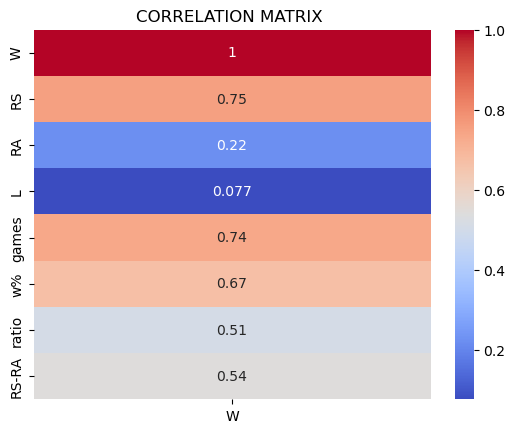

In [223]:
#FILTERING DATA TO PREDICT WINS:

#relevant variables to predict the number of wins per season:
wins = df[['W','RS','RA','L']]
#calculating the total number of games per season:
wins['games'] = wins['W']+wins['L']
#calculating the percentage of wins per season best known as W-L%
wins['w%'] = wins['W']/wins['games']
#pythoric proportion used by Bill James to predict the number of wins using runs scored and runs allowed:
wins['ratio'] = (wins['RS'])**2 / ((wins['RS'])**2 + (wins['RA'])**2)
#basic version of the pythoric version used above:
wins['RS-RA']= wins['RS']-wins['RA']
wins_corr = wins.corr()
#Visualizing the correlations:
sns.heatmap(wins_corr[['W']], annot = True, cmap = 'coolwarm')

plt.title('WINS CORRELATION MATRIX ')
plt.show()



# by looking at the Wins row we can see that the best predictor is RS, RS-RA, and total Games:
# Let's test the model by using the combination if these variables:

In [149]:
#BUILDING THE WINS MODEL WITH RS-RA and total games:

X = wins[['games','RS-RA']]
y = wins['W']

#BUILDING THE MODEL
model_W1 = LinearRegression()
model_W1.fit(X, y)
r_squared = model_W1.score(X, y)

# COEFFICIENTS AND R-SQUARED
print('Number of Wins Model:')
print(f'Intercept: {model_W1.intercept_}')
print(f'Coefficients: {model_W1.coef_}')
print(f"R-squared_Wins: {r_squared}")


Number of Wins Model:
Intercept: -0.1191998769409075
Coefficients: [0.50219239 0.0775434 ]
R-squared_Wins: 0.8378391605060305


In [151]:
#BUILDING THE WINS MODEL WITH RS AND GAMES:

X = wins[['games','RS']]
y = wins['W']

#BUILDING THE MODEL
model_W2 = LinearRegression()
model_W2.fit(X, y)
r_squared = model_W2.score(X, y)

# COEFFICIENTS AND R-SQUARED
print('Number of Wins Model:')
print(f'Intercept: {model_W2.intercept_}')
print(f'Coefficients: {model_W2.coef_}')
print(f"R-squared_Wins: {r_squared}")

Number of Wins Model:
Intercept: -7.313806179268916
Coefficients: [0.30059611 0.06792988]
R-squared_Wins: 0.6919793389819393


In [153]:
#BUILDING THE WINS MODEL BY USING THE BILL JAMES RATIO AND THE TOTAL GAMES:

X = wins[['games','ratio']]
y = wins['W']

#BUILDING THE MODEL
model_W3 = LinearRegression()
model_W3.fit(X, y)
r_squared = model_W3.score(X, y)

# COEFFICIENTS AND R-SQUARED
print('Number of Wins Model:')
print(f'Intercepto: {model_W3.intercept_}')
print(f'Coeficientes: {model_W3.coef_}')
print(f"R-squared_Wins: {r_squared}")

Number of Wins Model:
Intercepto: -20.289674515629954
Coeficientes: [ 0.51111648 39.31133078]
R-squared_Wins: 0.8184252963664245


# THE BEST MODEL TO PREDICT THE NUMBER OF WINS IS THE FIRST MODEL USING RS - RA AND TOTAL GAMES (model_W1)
# R-squared_Wins: 0.84

# THE TOTAL NUMBER OF GAMES PER SEASON IS 56 IN THE LVBP
# KNOW THAT WE KNOW THE TOTAL NUMBER OF GAMES WE NEED TO ESTIMATE THE RUNS SCORED AND THE RUNS ALLOWED BY A TEAM
# LET'S BUILD THE CORRELATION MATRIX TO LOOK FOR THE BEST INTERACTION OF VARIABLES:

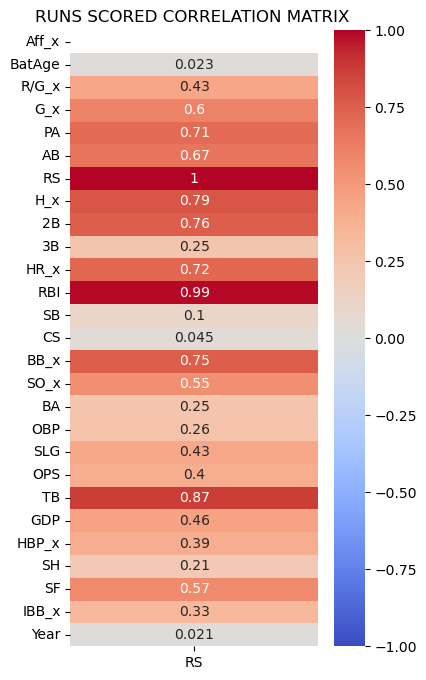

In [225]:
# batting stats:
columns = [
    'Aff_x', 'BatAge', 'R/G_x', 'G_x', 'PA', 'AB', 'RS', 'H_x', '2B', '3B', 'HR_x', 
    'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'GDP', 'HBP_x', 
    'SH', 'SF', 'IBB_x', 'Year'
]

# batting stats df
RS = df[columns]
RS_corr = RS.corr()
#correlation matrix for RUNS SCORED: 
plt.figure(figsize=(4, 8)) 
sns.heatmap(RS_corr[['RS']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('RUNS SCORED CORRELATION MATRIX ')
plt.show()

# THE BEST PREDICTORS FOR RUNS SCORED ARE: BB, TB, RBI, HR, 2B, HI, AB, PA:
# THEY STAND FOR:t# ched
PA -- Plate Appeaf#  each PA.
ABo# red/Allow/# Hits Allowed
2B -- Doubll# es Hit/Allowed
HR -- Home R# uns Hit/Allowed
RBIn  # -- Caught Stealing
BB -- r# s need 3.1 PA
pe
# WE NEED TO DETERMINED WHICH VARIABLES ARE INDIVIDUAL DEPENDENT, FOR EXAMPLE WE DECIDED TO DISCARD RBI SINCE THERE IS A INTERACTION BETWEEN THE PLAYER AT BAT AND THE TEAM MEMBERS, AND TO EXTRAPOLATE THIS STAT FROM LEAGUE TO LEAGUE IS DIFFICULT. 
# FROM PREVIOUS SEASONS WE CAN ESTIMATE THE NUMBER OF PLATE APPEREANCES. WE DECIDED TO USE PA SINCE IT IS MORE STABLE AND REALIABLE.
# TOTAL BASES CONSIDERS, THE FOLLOWING FORMULA:
# Total Bases (TB)=(1×SINGLES)+(2×DOUBLES)+(3×Triples)+(4×HR)
# LET'S BUILD THE PERFECT FIT:
Intentional Bases on Balls
First tracked in 1955

In [157]:
X = df[['H_x','BB_x','PA','2B','HR_x']]  # independent variable
y = df['RS']  # dependent variable

#BUILDING THE MODEL
model_RS1 = LinearRegression()
model_RS1.fit(X, y)
r_squared = model_RS1.score(X, y)

# COEFFICIENTS AND R-SQUARED
print('Runs Scored Model:')
print(f'Intercepto: {model_RS1.intercept_}')
print(f'Coeficientes: {model_RS1.coef_}')
print(f"R-squared_RS1: {r_squared}")

Runs Scored Model:
Intercepto: 39.53507130021737
Coeficientes: [ 0.57537331  0.4936135  -0.10779759  0.22488172  1.18930207]
R-squared_RS1: 0.8818940062813284


In [159]:
X = df[['TB','BB_x','PA']]  # independent variable
y = df['RS']  # dependent variable

#BUILDING THE MODEL
model_RS2 = LinearRegression()
model_RS2.fit(X, y)
r_squared = model_RS2.score(X, y)

# COEFFICIENTS AND R-SQUARED
print('Runs Scored Model:')
print(f'Intercepto: {model_RS2.intercept_}')
print(f'Coeficientes: {model_RS2.coef_}')
print(f"R-squared_RS1: {r_squared}")

Runs Scored Model:
Intercepto: 41.14022959141914
Coeficientes: [ 0.45174839  0.47956733 -0.09398016]
R-squared_RS1: 0.8848684569689762


In [71]:
# THE BEST MODEL TO PREDICT THE NUMBER OF WINS IS THE SECOND MODEL USING TB, BB AND PA (model_RS2)
# R-squared_Wins: 0.89

# THE RS2 MODEL IS GREAT SINCE SUMMARIZES THE OFFENSIVE POTENTIAL THAT A PLAYER HAS IN A SINGLE STAT, IN FUTURE MODELS IS EASIER TO EXTRAPOLATE A SINGLE STAT COMPARED TO MULTIPLE ONES
# LET'S BUILD THE RUNS ALLOWED MODEL

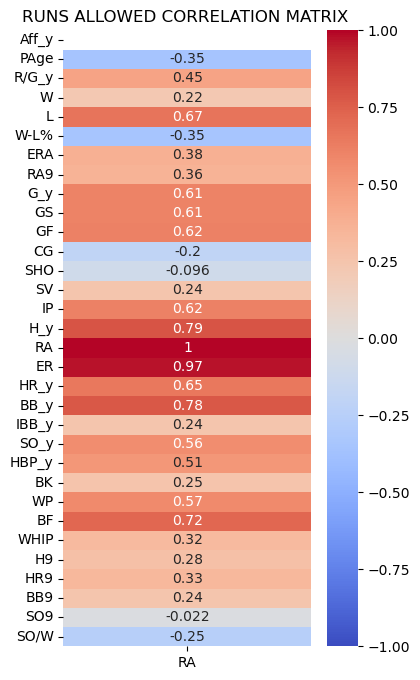

In [227]:
#BUILDING THE MODEL TO PREDICT RUNS ALLOWED
#SELECTING PITCHING VARIABLES
allowed = df[['Aff_y', 'PAge', 'R/G_y', 'W', 'L', 'W-L%', 'ERA', 'RA9', 'G_y', 'GS', 'GF', 'CG', 'SHO', 'SV',
    'IP', 'H_y', 'RA', 'ER', 'HR_y', 'BB_y', 'IBB_y', 'SO_y', 'HBP_y', 'BK', 'WP', 'BF', 'WHIP', 'H9',
    'HR9', 'BB9', 'SO9', 'SO/W']]
RA_corr = allowed.corr()
# CORRELATION MATRIX FOR RUNS ALLOWED
plt.figure(figsize=(4, 8)) 
sns.heatmap(RA_corr[['RA']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('RUNS ALLOWED CORRELATION MATRIX ')
plt.show()

# THE BEST PREDICTORS ARE: IP,H,ER,HR,BB,BF
# THEY STAND FOR:
# IP: INNINGS PITCHED
# H: HITS
# ER: EARNED RUNS
# HR: HOME RUNS
# BB: BASE ON BALLS
# BF: BATTERS FACED
# WE DECIDED TO DISCARD BF SINCE IT DEPENDS ON OTHER THINGS NOT RELATED WITH THE PITCHER PERFORMANCE. "ER" IS BASICALLY THE SAME AS "RA"

In [163]:
# Imprimir las correlaciones con 'RA'
#BUILDING THE RA MODEL:
X = df[['H_y','BB_y','HR_y','IP']]  # independent variable
y = df['RA']  # dependent variable

#BUILDING THE MODEL
model_RA = LinearRegression()
model_RA.fit(X, y)
r_squared = model_RA.score(X, y)

# COEFFICIENTS AND R-SQUARED
print('Runs Allowed Model:')
print(f'Intercepto: {model_RA.intercept_}')
print(f'Coeficientes: {model_RA.coef_}')
print(f"R-squared_RA: {r_squared}")

Runs Allowed Model:
Intercepto: 22.707981094964396
Coeficientes: [ 0.63296408  0.54647266  0.74332454 -0.45236835]
R-squared_RA: 0.8888420840780054


# THE RA MODEL HAS A GREAT R-SQUED OF 0.89

# KNOW THAT WE HAVE THE MODELS WE CAN PREDICT THE TESTING DATA SET AND ASSESS THE PERFORMANCE OF THE MODEL WITH THE RESULTS

# TESTING THE MODEL:

In [175]:
test = pd.read_csv('LVBP_test.csv')
test

#testing RS model:
X = test[['TB','BB_x','PA']]
RS_pred = model_RS2.predict(X)
df_RS = pd.DataFrame(RS_pred, columns=['RS_pred'])

#testing RA model:
X = test[['H_y','BB_y','HR_y','IP']]
RA_pred = model_RA.predict(X)
df_RA = pd.DataFrame(RA_pred, columns=['RA_pred'])



In [177]:
#testing WINS model:
df_combined = df_RS.join(df_RA)
df_combined['RS-RA'] = df_combined['RS_pred']-df_combined['RA_pred']
df_combined['games'] = 56

X = df_combined[['games','RS-RA']]
W_pred = model_W1.predict(X)
df_W = pd.DataFrame(W_pred, columns=['W_pred'])

#ASSESSING THE ACCURACY OF THE MODEL:
test_W = test['W']
df_W = df_W['W_pred']
SSE = np.sum((test_W - df_W) ** 2)
SST = np.sum((test_W - np.mean(test_W)) ** 2)
R_squared = 1 - (SSE / SST)
print("R-SQUARED:", R_squared)

R-SQUARED: 0.6907557117244427


# WE CAN SEE THAT THE MODEL HAS A DECENT ACCURACY ON PREDICTING WHICH TEAMS ARE GOING TO THE SEMIFINALS. IN TERMS OF ORDERS IS NOT ACCURATE, BUT WE CAN CONCLUDE THAT WE HAVE A DECENT GRASP ON KNOWING WHICH ARE GOING TO BE THE BEST TEAMS IN THE SEASON

In [272]:
df_W = pd.DataFrame(W_pred, columns=['W_pred'])
test_team = test[['Tm','W']]
results = df_W.join(test_team)
results = results.sort_values(by = 'W', ascending = False)
results = results.round()
results
results = results.rename(columns={'W': 'Real_Wins', 'W_pred': 'Predicted_Wins'})
results

,Predicted_Wins,Tm,Real_Wins
0,32.0,Cardenales de Lara,33
1,31.0,Bravos de Margarita,31
2,28.0,Aguilas del Zulia,30
3,30.0,Navegantes del Magallanes,29
4,28.0,Leones del Caracas,27
5,29.0,Tigres de Aragua,27
6,25.0,Tiburones de La Guaira,26
7,26.0,Caribes de Anzoategui,22


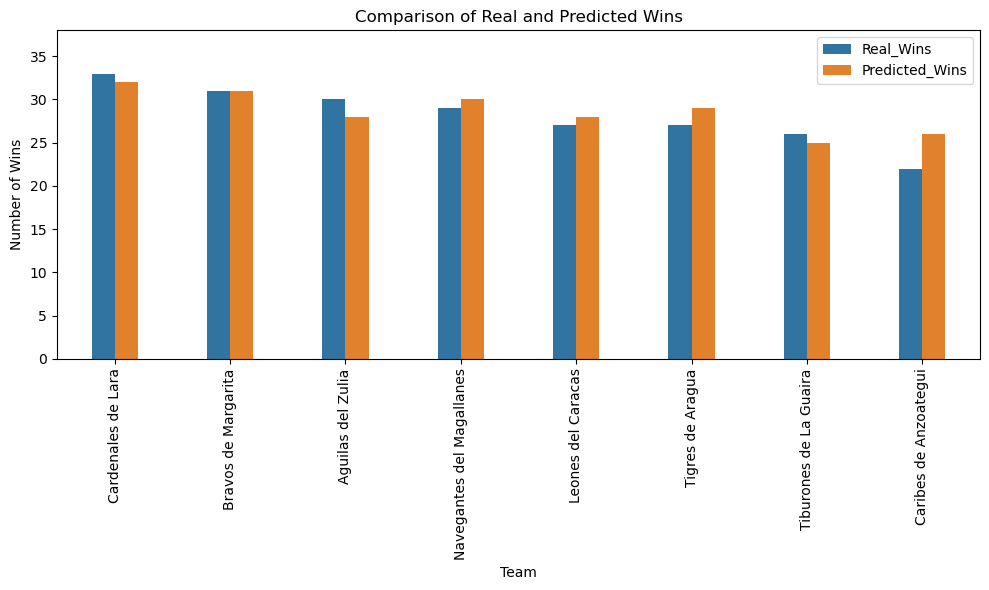

In [276]:
results_melted = results.melt(id_vars='Tm', value_vars=['Real_Wins', 'Predicted_Wins'], 
                              var_name='Type', value_name='Wins')

# Creamos la paleta personalizada con azul y anaranjado
custom_palette = {'Real_Wins': '#1f77b4', 'Predicted_Wins': '#ff7f0e'}  # Azul para 'Real_Wins', anaranjado para 'Predicted_Wins'

# Crear el gráfico de barras con la paleta personalizada
plt.figure(figsize=(10, 6))
sns.barplot(x='Tm', y='Wins', hue='Type', data=results_melted, palette=custom_palette, width=0.4)

# Personalizamos el gráfico
plt.title('Comparison of Real and Predicted Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)  # Rotamos los nombres de los equipos para mejorar la visibilidad

# Leyenda por defecto (sin etiquetas personalizadas)
plt.legend(loc='upper right')

# Ajuste de la escala del eje y
plt.ylim(0, results_melted['Wins'].max() + 5)  # Aumenta el límite superior del eje y

# Eliminamos el índice sobre las barras
plt.tight_layout()

# Mostramos el gráfico
plt.show()